<a href="https://colab.research.google.com/github/The19146267/AI/blob/main/Tien_Viet_Nam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm

[[133 149 148 ... 146 147 111]
 [222 246 246 ... 241 243 163]
 [222 249 248 ... 241 246 167]
 ...
 [224 251 251 ... 248 250 175]
 [210 234 235 ... 231 233 163]
 [ 89  94  94 ...  93  92  81]]


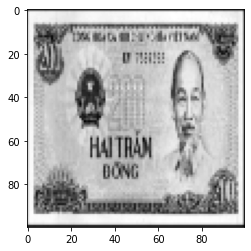

In [ ]:
datadir = "/content/drive/MyDrive/Money"
categories=['0.2k','0.5k','1k','2k','5k','10k','20k','50k','100k','200k','500k']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [ ]:
#creating training data
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 10/10 [00:00<00:00, 190.03it/s]

107


In [ ]:
#saving (x:picture), (y:label)
X=[]
y=[]
for features, label in training_data :
  X.append(features)
  y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('X',X.shape)
print('y',y.shape)

X (107, 100, 100, 1)
y (107,)


In [ ]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/Money")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/Money")
pickle.dump(y,pickle_out)
pickle_out.close()

IsADirectoryError: ignored